## Importing the Dependencies

In [1]:
import numpy as np #for computations
import pandas as pd #for data storage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Data Processing

In [3]:
#loading the dataset to a pandas Dataframe
sonar_data = pd.read_csv('Datasets/sonar data.csv', header=None)

In [4]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
# number of rows and columns
sonar_data.shape

(208, 61)

There are 60 features and 208 data points - last column represents whether it is rock or mine

In [7]:
sonar_data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [9]:
sonar_data.nunique()

0     177
1     182
2     190
3     181
4     193
     ... 
56    121
57    124
58    119
59    109
60      2
Length: 61, dtype: int64

In [10]:
duplicated_rows = sonar_data.duplicated()

In [11]:
duplicated_rows

0      False
1      False
2      False
3      False
4      False
       ...  
203    False
204    False
205    False
206    False
207    False
Length: 208, dtype: bool

M --> Mine

R --> Rock

In [12]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [13]:
# separating data and Labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()

In [15]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [16]:
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


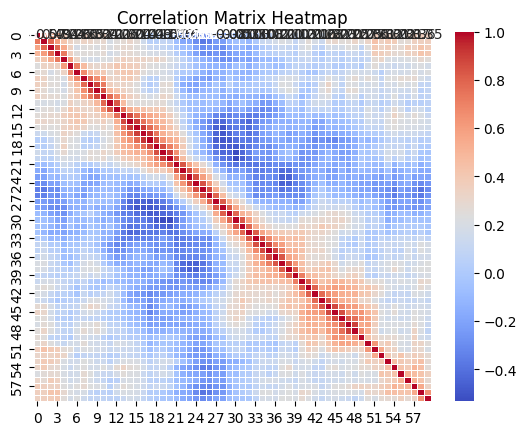

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
missing_values = sonar_data.isnull().sum()
for i in missing_values:
    if i>0:
        print(i)

## Training and Test data

In [19]:
from scipy import sparse
if sparse.issparse(X):
    X = X.toarray()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

X_Train, Y_Train are the training data , X_Test, Y_Test are the testing data - X_Test_predictions are the predicted values. Test data size will 0.1 times that is 10% of the original dataset while others will be training dataset. Stratify - separate based on Y - based on rock and mine, if random_state is 1 then throughout any system random state 1 will be same split of data

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [21]:
print(X_train)
print(Y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

## Model Training --> Logistic Regression 

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()

In [31]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

In [32]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [25]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [26]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [27]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7619047619047619


In [30]:
# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, X_test_prediction))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, X_test_prediction))


Classification Report:
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21


Confusion Matrix:
[[9 2]
 [3 7]]


<strong>For Logistic Regression</strong>: We can see that the accuracy is decent - Confusion matrix shows better classification

## Making a Predictive System

In [33]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')


['M']
The object is a mine


### Confusion Matrix

## Feature Scaling

### Logistic Regression without PCA

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, Y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21


Confusion Matrix:
[[9 2]
 [3 7]]


### Logistic Regression with PCA

In [37]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           M       0.69      0.82      0.75        11
           R       0.75      0.60      0.67        10

    accuracy                           0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21


Confusion Matrix:
[[9 2]
 [4 6]]


<strong>For Logistic Regression with PCA</strong>: We can see that the accuracy is not improved but reduced than the normal Logistic regression without PCA - Confusion matrix shows worser classification for negative examples and the positive examples remains the same

### Random Forest Classifier with PCA

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA
pca = PCA(n_components=10)  # You can adjust the number of components based on your needs
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           M       0.77      0.91      0.83        11
           R       0.88      0.70      0.78        10

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21


Confusion Matrix:
[[10  1]
 [ 3  7]]


<strong>For Random forest classifier with PCA</strong>: We can see that the accuracy is improved - Confusion matrix shows better classification of positive values but the negative values remains the same

### Random forest classifier without PCA

In [38]:
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21


Confusion Matrix:
[[9 2]
 [3 7]]


### SVM with PCA

In [39]:
from sklearn.svm import SVC

# Create and train the Support Vector Machine (SVM) classifier
model = SVC(kernel='linear', C=1.0, random_state=1)
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           M       0.71      0.91      0.80        11
           R       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21


Confusion Matrix:
[[10  1]
 [ 4  6]]


<strong>For Support Vector Machine with PCA</strong>: We can see that the accuracy is almost the same as logistic regression without PCA - Confusion matrix shows better classification of positive values but the negative values is only decent

### SVM without PCA

In [40]:
model = SVC(kernel='linear', C=1.0, random_state=1)
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           M       0.73      0.73      0.73        11
           R       0.70      0.70      0.70        10

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21


Confusion Matrix:
[[8 3]
 [3 7]]


<strong>For SVM without PCA</strong>: We can see that the accuracy is getting worser - The other methods have better accuracy than this

### Decision Tree without PCA

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           M       0.89      0.73      0.80        11
           R       0.75      0.90      0.82        10

    accuracy                           0.81        21
   macro avg       0.82      0.81      0.81        21
weighted avg       0.82      0.81      0.81        21


Confusion Matrix:
[[8 3]
 [1 9]]


### Decision Tree with PCA

In [42]:
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           M       0.83      0.91      0.87        11
           R       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21


Confusion Matrix:
[[10  1]
 [ 2  8]]


### Neural network without PCA

In [43]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           M       0.83      0.91      0.87        11
           R       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21


Confusion Matrix:
[[10  1]
 [ 2  8]]


### Neural Network with PCA

In [44]:
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           M       0.82      0.82      0.82        11
           R       0.80      0.80      0.80        10

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21


Confusion Matrix:
[[9 2]
 [2 8]]


### KNN without PCA

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train.values, Y_train.values)

# Make predictions
y_pred = model.predict(X_test.values)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           M       0.85      1.00      0.92        11
           R       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21


Confusion Matrix:
[[11  0]
 [ 2  8]]


### KNN with PCA

In [46]:
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           M       0.92      1.00      0.96        11
           R       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21


Confusion Matrix:
[[11  0]
 [ 1  9]]


### Native Bayes without PCA

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           M       0.67      0.55      0.60        11
           R       0.58      0.70      0.64        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.63      0.62      0.62        21


Confusion Matrix:
[[6 5]
 [3 7]]


### Native Bayes without PCA

In [48]:
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           M       0.80      0.73      0.76        11
           R       0.73      0.80      0.76        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21


Confusion Matrix:
[[8 3]
 [2 8]]


### Gradient Boosting Classifier without PCA

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21


Confusion Matrix:
[[9 2]
 [3 7]]


### Gradient Boosting with PCA

In [50]:
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           M       0.77      0.91      0.83        11
           R       0.88      0.70      0.78        10

    accuracy                           0.81        21
   macro avg       0.82      0.80      0.81        21
weighted avg       0.82      0.81      0.81        21


Confusion Matrix:
[[10  1]
 [ 3  7]]


### Ridge Classifier without PCA

In [51]:
from sklearn.linear_model import RidgeClassifier

alpha_value = 1.0

# Ridge Classifier model
model = RidgeClassifier(alpha=alpha_value)
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           M       0.75      0.82      0.78        11
           R       0.78      0.70      0.74        10

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.76      0.76      0.76        21


Confusion Matrix:
[[9 2]
 [3 7]]


### Ridge Classifier with PCA

In [52]:
model.fit(X_train_pca, Y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:')
print(classification_report(Y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           M       0.69      0.82      0.75        11
           R       0.75      0.60      0.67        10

    accuracy                           0.71        21
   macro avg       0.72      0.71      0.71        21
weighted avg       0.72      0.71      0.71        21


Confusion Matrix:
[[9 2]
 [4 6]]


## Cross Validation and Hyperparameter Tuning

In [53]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from scipy import sparse

models = [
    ('Logistic Regression', LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 150, 200]}),
    ('Gradient Boosting', GradientBoostingClassifier(), {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    ('Neural Network', MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}),
    ('SVM', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ('Ridge Classifier', RidgeClassifier(), {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})
]

# Loop through each model
for name, model, params in models:
    print(f"\nProcessing {name}...")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {np.mean(cv_scores)}")

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    print(f"Best Parameters: {grid_search.best_params_}")

    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    print(f"Test Set Accuracy: {test_accuracy}")

    print("\n-------------------------------------------")


Processing Logistic Regression...
Cross-Validation Scores: [0.78947368 0.78947368 0.89189189 0.75675676 0.72972973]
Mean CV Score: 0.7914651493598862
Best Parameters: {'C': 10}
Test Set Accuracy: 0.7619047619047619

-------------------------------------------

Processing Naive Bayes...
Cross-Validation Scores: [0.68421053 0.65789474 0.67567568 0.78378378 0.78378378]
Mean CV Score: 0.7170697012802275
Best Parameters: {}
Test Set Accuracy: 0.6190476190476191

-------------------------------------------

Processing Decision Tree...
Cross-Validation Scores: [0.81578947 0.76315789 0.67567568 0.64864865 0.83783784]
Mean CV Score: 0.748221906116643
Best Parameters: {'max_depth': None}
Test Set Accuracy: 0.7142857142857143

-------------------------------------------

Processing Random Forest...
Cross-Validation Scores: [0.89473684 0.78947368 0.81081081 0.72972973 0.91891892]
Mean CV Score: 0.8287339971550498
Best Parameters: {'n_estimators': 200}
Test Set Accuracy: 0.7142857142857143

------

In [55]:
knn_model = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

print("Processing KNN Classifier...")

cv_scores = cross_val_score(knn_model, X_train.values, Y_train.values, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set using the best model
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")

Processing KNN Classifier...
Cross-Validation Scores: [0.89473684 0.73684211 0.75675676 0.75675676 0.75675676]
Mean CV Score: 0.7803698435277383
Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Test Set Accuracy: 0.9047619047619048


In [56]:
models = [
    ('Logistic Regression', LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [50, 100, 150, 200]}),
    ('Gradient Boosting', GradientBoostingClassifier(), {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    ('Neural Network', MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}),
    ('SVM', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ('Ridge Classifier', RidgeClassifier(), {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})
]

# Loop through each model
for name, model, params in models:
    print(f"\nProcessing {name}...")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_pca, Y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {np.mean(cv_scores)}")

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_pca, Y_train)

    print(f"Best Parameters: {grid_search.best_params_}")

    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test_pca)
    test_accuracy = accuracy_score(Y_test, y_pred)
    print(f"Test Set Accuracy: {test_accuracy}")

    print("\n-------------------------------------------")


Processing Logistic Regression...
Cross-Validation Scores: [0.81578947 0.65789474 0.81081081 0.78378378 0.83783784]
Mean CV Score: 0.7812233285917497
Best Parameters: {'C': 0.01}
Test Set Accuracy: 0.7142857142857143

-------------------------------------------

Processing Naive Bayes...
Cross-Validation Scores: [0.78947368 0.73684211 0.78378378 0.75675676 0.83783784]
Mean CV Score: 0.7809388335704124
Best Parameters: {}
Test Set Accuracy: 0.7619047619047619

-------------------------------------------

Processing Decision Tree...
Cross-Validation Scores: [0.89473684 0.78947368 0.78378378 0.72972973 0.83783784]
Mean CV Score: 0.8071123755334282
Best Parameters: {'max_depth': None}
Test Set Accuracy: 0.8571428571428571

-------------------------------------------

Processing Random Forest...
Cross-Validation Scores: [0.86842105 0.78947368 0.83783784 0.83783784 0.89189189]
Mean CV Score: 0.8450924608819346
Best Parameters: {'n_estimators': 150}
Test Set Accuracy: 0.8095238095238095

---

In [58]:
knn_model = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

print("Processing KNN Classifier...")

cv_scores = cross_val_score(knn_model, X_train_pca, Y_train.values, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set using the best model
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_pca)
test_accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")

Processing KNN Classifier...
Cross-Validation Scores: [0.94736842 0.76315789 0.83783784 0.86486486 0.83783784]
Mean CV Score: 0.8502133712660029
Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Test Set Accuracy: 1.0
